In [1]:
!pip install indic-nlp-library
!pip install sacrebleu
!pip install nltk

   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------- ----------------------------- 10.2/40.3 kB ? eta -:--:--
   ------------------------------ --------- 30.7/40.3 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------- 40.3/40.3 kB 384.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
    --------------------------------------- 0.0/2.8 MB 991.0 kB/s eta 0:00:03
   - -------------------------------------- 0.1/2.8 MB 1.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.2/2.8 MB 1.7 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.8 MB 2.5 MB/s eta 0:00:01
   --------- ------------------------------ 0.7/2.8 MB 3.0 MB/s eta 0:00:01
   --------------- ------------------------ 1.1/2.8 MB 4.1 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 6.5 MB/s eta 0:00:01
   -------------------------------------- - 2.7/2.8 MB 7.5 MB/s eta 0:00:01
   -----------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\pooja\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\pooja\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.5 MB 558.5 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.5 MB 1.4 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 2.4 MB/s eta 0:00:01
   ---------------------- ----------------- 0.9/1.5 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.5 MB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\pooja\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
# import sentencepiece as spm
import numpy as np

from sklearn.model_selection import train_test_split
from indicnlp.tokenize import indic_tokenize  
import random
import torch.nn.functional as F
from tqdm import tqdm
import tqdm as notebook_tqdm
import json
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import sacrebleu

ModuleNotFoundError: No module named 'sklearn'

In [ ]:


df= pd.read_csv('/kaggle/input/comb-modi/Combined_data.csv')
# df = df.drop('Unnamed: 2', axis=1)
print(len(df))
df.dropna()
print(len(df))

# Identify duplicates in each column
duplicates_col1 = df.duplicated('Hindi', keep=False)
duplicates_col2 = df.duplicated('Bhili', keep=False)

# Combine the conditions to identify rows where either column has duplicates
duplicates_any_col = duplicates_col1 | duplicates_col2
df_cleaned = df[~duplicates_any_col]

len(df_cleaned)
df= df_cleaned
len(df)
df_train, df_val = train_test_split(df, test_size=0.05, random_state=42, shuffle= True)
print(len(df_train), len(df_val))
df_train.head(n=20)
df_train.tail(n=20)
df_val.tail(n=20)

14076
14076
11044 582


,Hindi,Bhili
6618,मुझे आलू उबालकर खाना पसंद है ।,मन बटांका उका‍नीन खावानू असेल लाग छे ।
11729,"और आज देश में व्‍यापक रूप से चर्चा चल रही है, ...",एक देह’ मा एक हाते सुनाव” ये वात पण थावी जोवे।
3420,मुझे अजीब लग रहा है।,मेसे वारू निही लागे ।
6445,तुम जाकर पौधों को छुओ।,तमे जाय ने तरू ने धरो ।
5750,तुम्‍हारी बहन को क्‍या पसंद है।,तारो बोहन काय काय पसंद दे
33,मैं अभी आई।,हूँ हमणेस आवी।
8647,वह दूध पीता है।,पेलो दुध पितेलो
3429,क्‍या सब ठीक है।,कायरे सुब वारलूत की ।
665,फलदार पेड़ों के नाम की सूची बनाइए।,फलदार झाडवा ना नाम नी सूची बणावो
13681,"मैं आपके बीच प्रधान मंत्री के रूप में नहीं, प्...","हुं तमारे वस मा प्रधान मंत्री ना वेह मा कोईन, ..."


11044 582


<class 'pandas.core.frame.DataFrame'>
Index: 11044 entries, 871 to 8658
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Hindi   11044 non-null  object
 1   Bhili   11044 non-null  object
dtypes: object(2)
memory usage: 258.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 13501 to 4936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Hindi   582 non-null    object
 1   Bhili   582 non-null    object
dtypes: object(2)
memory usage: 13.6+ KB
None None
11044
582
tensor([[   9,  474,  135,  ...,    2,    2,    2],
        [5055,   31,  362,  ...,    2,    2,    2],
        [ 268,   88,  398,  ...,    2,    2,    2],
        ...,
        [8117, 8120, 8121,  ...,    2,    2,    2],
        [6318,  114, 3752,  ...,    2,    2,    2],
        [  47, 2668,  477,  ...,    2,    2,    2]])
12730 23730
enc dim : 16 | dec dim : 32


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 1 | Train Loss: 9.091 | Val Loss : 7.650


100%|██████████| 346/346 [01:17<00:00,  4.46it/s]


Epoch: 2 | Train Loss: 7.343 | Val Loss : 7.356


100%|██████████| 346/346 [01:17<00:00,  4.47it/s]


Epoch: 3 | Train Loss: 7.105 | Val Loss : 7.292


100%|██████████| 346/346 [01:17<00:00,  4.46it/s]


Epoch: 4 | Train Loss: 6.952 | Val Loss : 7.272


100%|██████████| 346/346 [01:17<00:00,  4.46it/s]


Epoch: 5 | Train Loss: 6.836 | Val Loss : 7.283


100%|██████████| 346/346 [01:17<00:00,  4.46it/s]


Epoch: 6 | Train Loss: 6.747 | Val Loss : 7.259


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 7 | Train Loss: 6.642 | Val Loss : 7.267


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 8 | Train Loss: 6.565 | Val Loss : 7.266


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 9 | Train Loss: 6.484 | Val Loss : 7.323


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 10 | Train Loss: 6.401 | Val Loss : 7.342


100%|██████████| 346/346 [01:17<00:00,  4.46it/s]


Epoch: 11 | Train Loss: 6.333 | Val Loss : 7.405


100%|██████████| 346/346 [01:17<00:00,  4.46it/s]


Epoch: 12 | Train Loss: 6.276 | Val Loss : 7.403


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 13 | Train Loss: 6.204 | Val Loss : 7.441


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 14 | Train Loss: 6.154 | Val Loss : 7.477


100%|██████████| 346/346 [01:17<00:00,  4.46it/s]


Epoch: 15 | Train Loss: 6.084 | Val Loss : 7.519


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 16 | Train Loss: 6.030 | Val Loss : 7.462


100%|██████████| 346/346 [01:17<00:00,  4.46it/s]


Epoch: 17 | Train Loss: 5.975 | Val Loss : 7.584


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 18 | Train Loss: 5.923 | Val Loss : 7.530


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 19 | Train Loss: 5.873 | Val Loss : 7.554


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 20 | Train Loss: 5.825 | Val Loss : 7.609


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 21 | Train Loss: 5.781 | Val Loss : 7.559


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 22 | Train Loss: 5.746 | Val Loss : 7.540


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 23 | Train Loss: 5.719 | Val Loss : 7.557


100%|██████████| 346/346 [01:17<00:00,  4.46it/s]


Epoch: 24 | Train Loss: 5.674 | Val Loss : 7.576


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 25 | Train Loss: 5.633 | Val Loss : 7.554


100%|██████████| 346/346 [01:17<00:00,  4.46it/s]


Epoch: 26 | Train Loss: 5.600 | Val Loss : 7.583


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 27 | Train Loss: 5.570 | Val Loss : 7.633


100%|██████████| 346/346 [01:17<00:00,  4.46it/s]


Epoch: 28 | Train Loss: 5.542 | Val Loss : 7.635


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 29 | Train Loss: 5.518 | Val Loss : 7.561


100%|██████████| 346/346 [01:17<00:00,  4.46it/s]


Epoch: 30 | Train Loss: 5.474 | Val Loss : 7.595


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 31 | Train Loss: 5.456 | Val Loss : 7.571


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 32 | Train Loss: 5.429 | Val Loss : 7.655


100%|██████████| 346/346 [01:17<00:00,  4.46it/s]


Epoch: 33 | Train Loss: 5.402 | Val Loss : 7.614


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 34 | Train Loss: 5.376 | Val Loss : 7.546


100%|██████████| 346/346 [01:17<00:00,  4.46it/s]


Epoch: 35 | Train Loss: 5.356 | Val Loss : 7.583


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 36 | Train Loss: 5.333 | Val Loss : 7.597


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 37 | Train Loss: 5.310 | Val Loss : 7.554


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 38 | Train Loss: 5.296 | Val Loss : 7.556


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 39 | Train Loss: 5.261 | Val Loss : 7.571


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 40 | Train Loss: 5.235 | Val Loss : 7.555


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 41 | Train Loss: 5.223 | Val Loss : 7.577


100%|██████████| 346/346 [01:17<00:00,  4.46it/s]


Epoch: 42 | Train Loss: 5.196 | Val Loss : 7.575


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 43 | Train Loss: 5.178 | Val Loss : 7.514


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 44 | Train Loss: 5.157 | Val Loss : 7.511


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 45 | Train Loss: 5.145 | Val Loss : 7.513


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 46 | Train Loss: 5.128 | Val Loss : 7.576


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 47 | Train Loss: 5.109 | Val Loss : 7.488


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 48 | Train Loss: 5.095 | Val Loss : 7.520


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 49 | Train Loss: 5.066 | Val Loss : 7.459


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 50 | Train Loss: 5.059 | Val Loss : 7.465


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 51 | Train Loss: 5.035 | Val Loss : 7.497


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 52 | Train Loss: 5.036 | Val Loss : 7.528


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 53 | Train Loss: 5.020 | Val Loss : 7.513


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 54 | Train Loss: 5.006 | Val Loss : 7.517


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 55 | Train Loss: 4.990 | Val Loss : 7.524


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 56 | Train Loss: 4.963 | Val Loss : 7.565


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 57 | Train Loss: 4.957 | Val Loss : 7.543


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 58 | Train Loss: 4.942 | Val Loss : 7.563


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 59 | Train Loss: 4.936 | Val Loss : 7.552


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 60 | Train Loss: 4.919 | Val Loss : 7.532


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 61 | Train Loss: 4.915 | Val Loss : 7.537


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 62 | Train Loss: 4.902 | Val Loss : 7.553


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 63 | Train Loss: 4.884 | Val Loss : 7.482


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 64 | Train Loss: 4.879 | Val Loss : 7.509


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 65 | Train Loss: 4.863 | Val Loss : 7.477


100%|██████████| 346/346 [01:18<00:00,  4.44it/s]


Epoch: 66 | Train Loss: 4.851 | Val Loss : 7.520


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 67 | Train Loss: 4.834 | Val Loss : 7.486


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 68 | Train Loss: 4.830 | Val Loss : 7.538


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 69 | Train Loss: 4.812 | Val Loss : 7.447


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 70 | Train Loss: 4.811 | Val Loss : 7.473


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 71 | Train Loss: 4.803 | Val Loss : 7.518


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 72 | Train Loss: 4.789 | Val Loss : 7.525


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 73 | Train Loss: 4.792 | Val Loss : 7.504


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 74 | Train Loss: 4.772 | Val Loss : 7.519


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 75 | Train Loss: 4.760 | Val Loss : 7.500


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 76 | Train Loss: 4.686 | Val Loss : 7.379


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 77 | Train Loss: 4.632 | Val Loss : 7.388


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 78 | Train Loss: 4.602 | Val Loss : 7.402


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 79 | Train Loss: 4.596 | Val Loss : 7.391


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 80 | Train Loss: 4.586 | Val Loss : 7.414


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 81 | Train Loss: 4.566 | Val Loss : 7.412


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 82 | Train Loss: 4.558 | Val Loss : 7.422


100%|██████████| 346/346 [01:17<00:00,  4.45it/s]


Epoch: 83 | Train Loss: 4.549 | Val Loss : 7.422


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 84 | Train Loss: 4.537 | Val Loss : 7.429


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 85 | Train Loss: 4.532 | Val Loss : 7.431


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 86 | Train Loss: 4.522 | Val Loss : 7.429


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 87 | Train Loss: 4.526 | Val Loss : 7.458


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 88 | Train Loss: 4.526 | Val Loss : 7.444


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 89 | Train Loss: 4.509 | Val Loss : 7.456


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 90 | Train Loss: 4.516 | Val Loss : 7.452


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 91 | Train Loss: 4.506 | Val Loss : 7.442


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 92 | Train Loss: 4.504 | Val Loss : 7.451


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 93 | Train Loss: 4.502 | Val Loss : 7.477


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 94 | Train Loss: 4.493 | Val Loss : 7.472


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 95 | Train Loss: 4.492 | Val Loss : 7.459


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 96 | Train Loss: 4.483 | Val Loss : 7.474


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 97 | Train Loss: 4.481 | Val Loss : 7.461


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 98 | Train Loss: 4.484 | Val Loss : 7.449


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 99 | Train Loss: 4.482 | Val Loss : 7.458


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 100 | Train Loss: 4.477 | Val Loss : 7.452


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 101 | Train Loss: 4.471 | Val Loss : 7.467


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 102 | Train Loss: 4.470 | Val Loss : 7.452


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 103 | Train Loss: 4.469 | Val Loss : 7.462


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 104 | Train Loss: 4.462 | Val Loss : 7.472


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 105 | Train Loss: 4.463 | Val Loss : 7.468


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 106 | Train Loss: 4.460 | Val Loss : 7.462


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 107 | Train Loss: 4.466 | Val Loss : 7.455


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 108 | Train Loss: 4.452 | Val Loss : 7.464


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 109 | Train Loss: 4.457 | Val Loss : 7.470


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 110 | Train Loss: 4.454 | Val Loss : 7.456


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 111 | Train Loss: 4.447 | Val Loss : 7.479


100%|██████████| 346/346 [01:19<00:00,  4.38it/s]


Epoch: 112 | Train Loss: 4.451 | Val Loss : 7.471


100%|██████████| 346/346 [01:19<00:00,  4.38it/s]


Epoch: 113 | Train Loss: 4.449 | Val Loss : 7.467


100%|██████████| 346/346 [01:19<00:00,  4.36it/s]


Epoch: 114 | Train Loss: 4.439 | Val Loss : 7.467


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 115 | Train Loss: 4.446 | Val Loss : 7.471


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 116 | Train Loss: 4.439 | Val Loss : 7.479


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 117 | Train Loss: 4.441 | Val Loss : 7.490


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 118 | Train Loss: 4.441 | Val Loss : 7.463


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 119 | Train Loss: 4.427 | Val Loss : 7.462


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 120 | Train Loss: 4.430 | Val Loss : 7.480


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 121 | Train Loss: 4.431 | Val Loss : 7.482


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 122 | Train Loss: 4.421 | Val Loss : 7.480


100%|██████████| 346/346 [01:19<00:00,  4.35it/s]


Epoch: 123 | Train Loss: 4.425 | Val Loss : 7.474


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 124 | Train Loss: 4.426 | Val Loss : 7.478


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 125 | Train Loss: 4.420 | Val Loss : 7.471


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 126 | Train Loss: 4.413 | Val Loss : 7.493


100%|██████████| 346/346 [01:19<00:00,  4.36it/s]


Epoch: 127 | Train Loss: 4.413 | Val Loss : 7.480


100%|██████████| 346/346 [01:19<00:00,  4.36it/s]


Epoch: 128 | Train Loss: 4.412 | Val Loss : 7.483


100%|██████████| 346/346 [01:19<00:00,  4.36it/s]


Epoch: 129 | Train Loss: 4.410 | Val Loss : 7.482


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 130 | Train Loss: 4.412 | Val Loss : 7.492


100%|██████████| 346/346 [01:19<00:00,  4.35it/s]


Epoch: 131 | Train Loss: 4.406 | Val Loss : 7.479


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 132 | Train Loss: 4.405 | Val Loss : 7.485


100%|██████████| 346/346 [01:19<00:00,  4.35it/s]


Epoch: 133 | Train Loss: 4.409 | Val Loss : 7.474


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 134 | Train Loss: 4.406 | Val Loss : 7.469


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 135 | Train Loss: 4.400 | Val Loss : 7.490


100%|██████████| 346/346 [01:19<00:00,  4.34it/s]


Epoch: 136 | Train Loss: 4.396 | Val Loss : 7.482


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 137 | Train Loss: 4.396 | Val Loss : 7.496


100%|██████████| 346/346 [01:19<00:00,  4.35it/s]


Epoch: 138 | Train Loss: 4.403 | Val Loss : 7.476


100%|██████████| 346/346 [01:19<00:00,  4.35it/s]


Epoch: 139 | Train Loss: 4.402 | Val Loss : 7.484


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 140 | Train Loss: 4.396 | Val Loss : 7.498


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 141 | Train Loss: 4.392 | Val Loss : 7.479


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 142 | Train Loss: 4.392 | Val Loss : 7.484


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 143 | Train Loss: 4.396 | Val Loss : 7.504


100%|██████████| 346/346 [01:19<00:00,  4.36it/s]


Epoch: 144 | Train Loss: 4.383 | Val Loss : 7.484


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 145 | Train Loss: 4.386 | Val Loss : 7.505


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 146 | Train Loss: 4.381 | Val Loss : 7.486


100%|██████████| 346/346 [01:19<00:00,  4.38it/s]


Epoch: 147 | Train Loss: 4.381 | Val Loss : 7.487


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 148 | Train Loss: 4.382 | Val Loss : 7.521


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 149 | Train Loss: 4.378 | Val Loss : 7.492


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 150 | Train Loss: 4.384 | Val Loss : 7.501


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 151 | Train Loss: 4.373 | Val Loss : 7.520


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 152 | Train Loss: 4.385 | Val Loss : 7.514


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 153 | Train Loss: 4.379 | Val Loss : 7.514


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 154 | Train Loss: 4.378 | Val Loss : 7.504


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 155 | Train Loss: 4.367 | Val Loss : 7.502


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 156 | Train Loss: 4.377 | Val Loss : 7.494


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 157 | Train Loss: 4.370 | Val Loss : 7.507


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 158 | Train Loss: 4.366 | Val Loss : 7.505


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 159 | Train Loss: 4.363 | Val Loss : 7.499


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 160 | Train Loss: 4.368 | Val Loss : 7.497


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 161 | Train Loss: 4.366 | Val Loss : 7.517


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 162 | Train Loss: 4.358 | Val Loss : 7.509


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 163 | Train Loss: 4.372 | Val Loss : 7.497


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 164 | Train Loss: 4.356 | Val Loss : 7.506


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 165 | Train Loss: 4.353 | Val Loss : 7.505


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 166 | Train Loss: 4.361 | Val Loss : 7.510


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 167 | Train Loss: 4.355 | Val Loss : 7.519


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 168 | Train Loss: 4.350 | Val Loss : 7.522


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 169 | Train Loss: 4.353 | Val Loss : 7.534


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 170 | Train Loss: 4.353 | Val Loss : 7.514


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 171 | Train Loss: 4.354 | Val Loss : 7.516


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 172 | Train Loss: 4.351 | Val Loss : 7.529


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 173 | Train Loss: 4.344 | Val Loss : 7.524


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 174 | Train Loss: 4.342 | Val Loss : 7.526


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 175 | Train Loss: 4.350 | Val Loss : 7.505


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 176 | Train Loss: 4.339 | Val Loss : 7.522


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 177 | Train Loss: 4.351 | Val Loss : 7.540


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 178 | Train Loss: 4.344 | Val Loss : 7.527


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 179 | Train Loss: 4.346 | Val Loss : 7.532


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 180 | Train Loss: 4.340 | Val Loss : 7.520


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 181 | Train Loss: 4.339 | Val Loss : 7.528


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 182 | Train Loss: 4.340 | Val Loss : 7.525


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 183 | Train Loss: 4.336 | Val Loss : 7.540


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 184 | Train Loss: 4.329 | Val Loss : 7.530


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 185 | Train Loss: 4.332 | Val Loss : 7.547


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 186 | Train Loss: 4.343 | Val Loss : 7.539


100%|██████████| 346/346 [01:19<00:00,  4.38it/s]


Epoch: 187 | Train Loss: 4.325 | Val Loss : 7.534


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 188 | Train Loss: 4.327 | Val Loss : 7.548


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 189 | Train Loss: 4.328 | Val Loss : 7.541


100%|██████████| 346/346 [01:19<00:00,  4.36it/s]


Epoch: 190 | Train Loss: 4.323 | Val Loss : 7.532


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 191 | Train Loss: 4.324 | Val Loss : 7.527


100%|██████████| 346/346 [01:19<00:00,  4.38it/s]


Epoch: 192 | Train Loss: 4.329 | Val Loss : 7.529


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 193 | Train Loss: 4.323 | Val Loss : 7.542


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 194 | Train Loss: 4.326 | Val Loss : 7.547


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 195 | Train Loss: 4.325 | Val Loss : 7.531


100%|██████████| 346/346 [01:19<00:00,  4.36it/s]


Epoch: 196 | Train Loss: 4.323 | Val Loss : 7.561


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 197 | Train Loss: 4.319 | Val Loss : 7.532


100%|██████████| 346/346 [01:19<00:00,  4.36it/s]


Epoch: 198 | Train Loss: 4.323 | Val Loss : 7.557


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 199 | Train Loss: 4.324 | Val Loss : 7.545


100%|██████████| 346/346 [01:19<00:00,  4.36it/s]


Epoch: 200 | Train Loss: 4.322 | Val Loss : 7.534


100%|██████████| 346/346 [01:19<00:00,  4.34it/s]


Epoch: 201 | Train Loss: 4.315 | Val Loss : 7.535


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 202 | Train Loss: 4.315 | Val Loss : 7.548


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 203 | Train Loss: 4.314 | Val Loss : 7.545


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 204 | Train Loss: 4.318 | Val Loss : 7.530


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 205 | Train Loss: 4.306 | Val Loss : 7.539


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 206 | Train Loss: 4.308 | Val Loss : 7.547


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 207 | Train Loss: 4.307 | Val Loss : 7.558


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 208 | Train Loss: 4.309 | Val Loss : 7.538


100%|██████████| 346/346 [01:19<00:00,  4.38it/s]


Epoch: 209 | Train Loss: 4.307 | Val Loss : 7.555


100%|██████████| 346/346 [01:19<00:00,  4.38it/s]


Epoch: 210 | Train Loss: 4.303 | Val Loss : 7.551


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 211 | Train Loss: 4.307 | Val Loss : 7.537


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 212 | Train Loss: 4.309 | Val Loss : 7.538


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 213 | Train Loss: 4.306 | Val Loss : 7.575


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 214 | Train Loss: 4.302 | Val Loss : 7.568


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 215 | Train Loss: 4.304 | Val Loss : 7.552


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 216 | Train Loss: 4.306 | Val Loss : 7.555


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 217 | Train Loss: 4.300 | Val Loss : 7.561


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 218 | Train Loss: 4.299 | Val Loss : 7.558


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 219 | Train Loss: 4.300 | Val Loss : 7.558


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 220 | Train Loss: 4.296 | Val Loss : 7.585


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 221 | Train Loss: 4.294 | Val Loss : 7.550


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 222 | Train Loss: 4.298 | Val Loss : 7.544


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 223 | Train Loss: 4.289 | Val Loss : 7.570


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 224 | Train Loss: 4.296 | Val Loss : 7.565


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 225 | Train Loss: 4.297 | Val Loss : 7.569


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 226 | Train Loss: 4.289 | Val Loss : 7.573


100%|██████████| 346/346 [01:19<00:00,  4.38it/s]


Epoch: 227 | Train Loss: 4.294 | Val Loss : 7.552


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 228 | Train Loss: 4.295 | Val Loss : 7.563


100%|██████████| 346/346 [01:18<00:00,  4.44it/s]


Epoch: 229 | Train Loss: 4.295 | Val Loss : 7.563


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 230 | Train Loss: 4.286 | Val Loss : 7.563


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 231 | Train Loss: 4.285 | Val Loss : 7.563


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 232 | Train Loss: 4.290 | Val Loss : 7.563


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 233 | Train Loss: 4.286 | Val Loss : 7.566


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 234 | Train Loss: 4.286 | Val Loss : 7.561


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 235 | Train Loss: 4.289 | Val Loss : 7.570


100%|██████████| 346/346 [01:19<00:00,  4.38it/s]


Epoch: 236 | Train Loss: 4.281 | Val Loss : 7.580


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 237 | Train Loss: 4.288 | Val Loss : 7.571


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 238 | Train Loss: 4.285 | Val Loss : 7.564


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 239 | Train Loss: 4.278 | Val Loss : 7.584


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 240 | Train Loss: 4.286 | Val Loss : 7.565


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 241 | Train Loss: 4.281 | Val Loss : 7.580


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 242 | Train Loss: 4.278 | Val Loss : 7.575


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 243 | Train Loss: 4.284 | Val Loss : 7.579


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 244 | Train Loss: 4.273 | Val Loss : 7.593


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 245 | Train Loss: 4.278 | Val Loss : 7.571


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 246 | Train Loss: 4.275 | Val Loss : 7.575


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 247 | Train Loss: 4.278 | Val Loss : 7.573


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 248 | Train Loss: 4.272 | Val Loss : 7.572


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 249 | Train Loss: 4.270 | Val Loss : 7.577


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 250 | Train Loss: 4.272 | Val Loss : 7.581


100%|██████████| 346/346 [01:17<00:00,  4.44it/s]


Epoch: 251 | Train Loss: 4.264 | Val Loss : 7.595


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 252 | Train Loss: 4.269 | Val Loss : 7.587


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 253 | Train Loss: 4.269 | Val Loss : 7.570


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 254 | Train Loss: 4.268 | Val Loss : 7.582


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 255 | Train Loss: 4.269 | Val Loss : 7.598


100%|██████████| 346/346 [01:18<00:00,  4.44it/s]


Epoch: 256 | Train Loss: 4.260 | Val Loss : 7.583


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 257 | Train Loss: 4.256 | Val Loss : 7.591


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 258 | Train Loss: 4.266 | Val Loss : 7.589


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 259 | Train Loss: 4.261 | Val Loss : 7.576


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 260 | Train Loss: 4.260 | Val Loss : 7.585


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 261 | Train Loss: 4.260 | Val Loss : 7.562


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 262 | Train Loss: 4.264 | Val Loss : 7.574


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 263 | Train Loss: 4.263 | Val Loss : 7.588


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 264 | Train Loss: 4.257 | Val Loss : 7.596


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 265 | Train Loss: 4.261 | Val Loss : 7.572


100%|██████████| 346/346 [01:18<00:00,  4.44it/s]


Epoch: 266 | Train Loss: 4.261 | Val Loss : 7.589


100%|██████████| 346/346 [01:18<00:00,  4.43it/s]


Epoch: 267 | Train Loss: 4.255 | Val Loss : 7.585


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 268 | Train Loss: 4.251 | Val Loss : 7.601


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 269 | Train Loss: 4.254 | Val Loss : 7.578


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 270 | Train Loss: 4.256 | Val Loss : 7.566


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 271 | Train Loss: 4.248 | Val Loss : 7.580


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 272 | Train Loss: 4.261 | Val Loss : 7.576


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 273 | Train Loss: 4.252 | Val Loss : 7.597


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 274 | Train Loss: 4.257 | Val Loss : 7.604


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 275 | Train Loss: 4.243 | Val Loss : 7.588


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 276 | Train Loss: 4.250 | Val Loss : 7.596


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 277 | Train Loss: 4.251 | Val Loss : 7.592


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 278 | Train Loss: 4.252 | Val Loss : 7.572


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 279 | Train Loss: 4.247 | Val Loss : 7.595


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 280 | Train Loss: 4.246 | Val Loss : 7.590


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 281 | Train Loss: 4.248 | Val Loss : 7.604


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 282 | Train Loss: 4.258 | Val Loss : 7.604


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 283 | Train Loss: 4.249 | Val Loss : 7.602


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 284 | Train Loss: 4.252 | Val Loss : 7.595


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 285 | Train Loss: 4.247 | Val Loss : 7.619


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 286 | Train Loss: 4.246 | Val Loss : 7.597


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 287 | Train Loss: 4.248 | Val Loss : 7.593


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 288 | Train Loss: 4.250 | Val Loss : 7.604


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 289 | Train Loss: 4.244 | Val Loss : 7.614


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 290 | Train Loss: 4.238 | Val Loss : 7.602


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 291 | Train Loss: 4.238 | Val Loss : 7.595


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 292 | Train Loss: 4.247 | Val Loss : 7.635


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 293 | Train Loss: 4.238 | Val Loss : 7.606


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 294 | Train Loss: 4.246 | Val Loss : 7.601


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 295 | Train Loss: 4.239 | Val Loss : 7.618


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 296 | Train Loss: 4.234 | Val Loss : 7.591


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 297 | Train Loss: 4.236 | Val Loss : 7.596


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 298 | Train Loss: 4.231 | Val Loss : 7.611


100%|██████████| 346/346 [01:19<00:00,  4.36it/s]


Epoch: 299 | Train Loss: 4.240 | Val Loss : 7.599


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 300 | Train Loss: 4.232 | Val Loss : 7.611


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 301 | Train Loss: 4.234 | Val Loss : 7.613


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 302 | Train Loss: 4.240 | Val Loss : 7.612


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 303 | Train Loss: 4.230 | Val Loss : 7.638


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 304 | Train Loss: 4.229 | Val Loss : 7.619


100%|██████████| 346/346 [01:19<00:00,  4.36it/s]


Epoch: 305 | Train Loss: 4.232 | Val Loss : 7.606


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 306 | Train Loss: 4.221 | Val Loss : 7.605


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 307 | Train Loss: 4.219 | Val Loss : 7.619


100%|██████████| 346/346 [01:18<00:00,  4.42it/s]


Epoch: 308 | Train Loss: 4.231 | Val Loss : 7.599


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 309 | Train Loss: 4.232 | Val Loss : 7.612


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 310 | Train Loss: 4.225 | Val Loss : 7.636


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 311 | Train Loss: 4.226 | Val Loss : 7.596


100%|██████████| 346/346 [01:19<00:00,  4.35it/s]


Epoch: 312 | Train Loss: 4.232 | Val Loss : 7.626


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 313 | Train Loss: 4.224 | Val Loss : 7.616


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 314 | Train Loss: 4.215 | Val Loss : 7.613


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 315 | Train Loss: 4.223 | Val Loss : 7.628


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 316 | Train Loss: 4.223 | Val Loss : 7.616


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 317 | Train Loss: 4.215 | Val Loss : 7.621


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 318 | Train Loss: 4.220 | Val Loss : 7.619


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 319 | Train Loss: 4.220 | Val Loss : 7.630


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 320 | Train Loss: 4.210 | Val Loss : 7.617


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 321 | Train Loss: 4.219 | Val Loss : 7.627


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 322 | Train Loss: 4.215 | Val Loss : 7.628


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 323 | Train Loss: 4.212 | Val Loss : 7.628


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 324 | Train Loss: 4.216 | Val Loss : 7.624


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 325 | Train Loss: 4.220 | Val Loss : 7.621


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 326 | Train Loss: 4.214 | Val Loss : 7.623


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 327 | Train Loss: 4.218 | Val Loss : 7.626


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 328 | Train Loss: 4.214 | Val Loss : 7.617


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 329 | Train Loss: 4.215 | Val Loss : 7.644


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 330 | Train Loss: 4.221 | Val Loss : 7.626


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 331 | Train Loss: 4.213 | Val Loss : 7.637


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 332 | Train Loss: 4.209 | Val Loss : 7.621


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 333 | Train Loss: 4.216 | Val Loss : 7.631


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 334 | Train Loss: 4.211 | Val Loss : 7.621


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 335 | Train Loss: 4.201 | Val Loss : 7.638


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 336 | Train Loss: 4.203 | Val Loss : 7.650


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 337 | Train Loss: 4.206 | Val Loss : 7.639


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 338 | Train Loss: 4.204 | Val Loss : 7.616


100%|██████████| 346/346 [01:19<00:00,  4.36it/s]


Epoch: 339 | Train Loss: 4.214 | Val Loss : 7.631


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 340 | Train Loss: 4.206 | Val Loss : 7.636


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 341 | Train Loss: 4.202 | Val Loss : 7.621


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 342 | Train Loss: 4.200 | Val Loss : 7.631


100%|██████████| 346/346 [01:18<00:00,  4.40it/s]


Epoch: 343 | Train Loss: 4.203 | Val Loss : 7.640


100%|██████████| 346/346 [01:19<00:00,  4.37it/s]


Epoch: 344 | Train Loss: 4.202 | Val Loss : 7.628


100%|██████████| 346/346 [01:19<00:00,  4.36it/s]


Epoch: 345 | Train Loss: 4.206 | Val Loss : 7.636


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 346 | Train Loss: 4.198 | Val Loss : 7.646


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 347 | Train Loss: 4.200 | Val Loss : 7.633


100%|██████████| 346/346 [01:18<00:00,  4.38it/s]


Epoch: 348 | Train Loss: 4.198 | Val Loss : 7.635


100%|██████████| 346/346 [01:18<00:00,  4.41it/s]


Epoch: 349 | Train Loss: 4.197 | Val Loss : 7.649


100%|██████████| 346/346 [01:18<00:00,  4.39it/s]


Epoch: 350 | Train Loss: 4.202 | Val Loss : 7.643


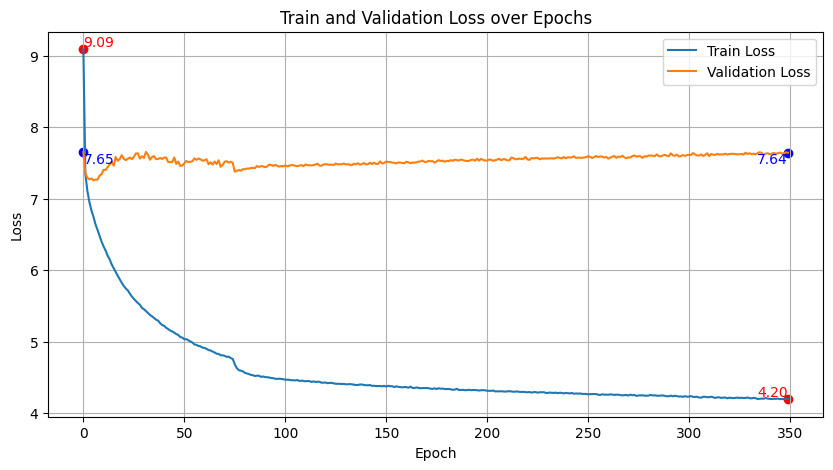

12730 23730


In [ ]:

hindi_vocab={}
bhili_vocab={}

# hindi_set= set()

hindi_vocab={'<start>':0, '<end>':1, '<pad>':2, '<unk>':3}
bhili_vocab={'<start>':0, '<end>':1, '<pad>':2, '<unk>':3}
ctr_h=4
def build_vocab_hindi(indic_string, vocab):
    global ctr_h
#     words= text.split(" ")
    for word in indic_tokenize.trivial_tokenize(indic_string): 
        if word not in vocab:
            vocab[word]= ctr_h
            ctr_h+=1
            
            
ctr_b=4
def build_vocab_bhili(indic_string, vocab):
    global ctr_b
#     words= text.split(" ")
    for word in indic_tokenize.trivial_tokenize(indic_string): 
        if word not in vocab:
            vocab[word]= ctr_b
            ctr_b+=1
# print(hindi_vocab)
for index, row in df.iterrows():
    text= row['Hindi']
    build_vocab_hindi(text, hindi_vocab)
#     print(f"{index}==>{text}")



for index, row in df.iterrows():
    text= row['Bhili']
#     print(text)
    build_vocab_bhili(text, bhili_vocab)
rev_hindi_vocab= {value: key for key, value in hindi_vocab.items()}
rev_bhili_vocab= {value: key for key, value in bhili_vocab.items()}
# print(rev_hindi_vocab)
# print(rev_bhili_vocab)
# print(len(hindi_vocab), len(bhili_vocab))
# import json

with open('/kaggle/working/hindi_vocab_chunked-speeches.json', 'w') as json_file:
    json.dump(hindi_vocab, json_file)
    
with open('/kaggle/working/bhili_vocab_chunked-speeches.json', 'w') as json_file:
    json.dump(bhili_vocab, json_file)

def hindi_tensor_to_hindi_words(hindi_tensor):
    hindi_tensor= hindi_tensor[0]
    hindi_numpy_tensor= hindi_tensor.cpu().numpy()
    list= [rev_hindi_vocab[item] for item in hindi_numpy_tensor]
    return list 

def bhili_tensor_to_bhili_words(bhili_tensor):
    bhili_tensor= bhili_tensor[0]
    bhili_numpy_tensor= bhili_tensor.cpu().numpy()
    list= [rev_bhili_vocab[item] for item in bhili_numpy_tensor]
    return list 

def tokenize_text(indic_string):
    tokens= indic_tokenize.trivial_tokenize(indic_string)
    return tokens


# Text to index functions
def hindi_to_indices(hindi_text):
    indices = [hindi_vocab.get(token, hindi_vocab['<unk>']) for token in tokenize_text(hindi_text)]
#     print(indices)
    # indices2 = [hindi_vocab['<start>']] + indices + [hindi_vocab['<end>']]
    indices2 =  indices + [hindi_vocab['<end>']]
    return indices2

def bhili_to_indices(bhili_text):
    indices = [bhili_vocab.get(token, bhili_vocab['<unk>']) for token in tokenize_text(bhili_text)]
    indices3 = [bhili_vocab['<start>']] + indices + [bhili_vocab['<end>']]
    return indices3
class Seq2SeqHinBhiliDataset(Dataset):
    def __init__(self, data, hindi_vocab, bhili_vocab):
        self.data = data.reset_index(drop=True)  # Reset indices to be continuous
        self.hindi_vocab = hindi_vocab
        self.bhili_vocab = bhili_vocab

    def __len__(self):
        return len(self.data) 

    def __getitem__(self, idx):
        hindi_text = self.data.iloc[idx]['Hindi']
        bhili_text = self.data.iloc[idx]['Bhili']
        
        hindi_indices = hindi_to_indices(hindi_text)
        bhili_indices = bhili_to_indices(bhili_text)
        
        return {
            'hindi_indices': torch.tensor(hindi_indices),
            'bhili_indices': torch.tensor(bhili_indices)
        }

def collate_fn(batch):
    hindi_indices = [item['hindi_indices'] for item in batch]
    bhili_indices = [item['bhili_indices'] for item in batch]

    # Pad sequences to the length of the longest sequence in the batch
    hindi_indices_padded = torch.nn.utils.rnn.pad_sequence(hindi_indices, batch_first=True, padding_value=2)
    bhili_indices_padded = torch.nn.utils.rnn.pad_sequence(bhili_indices, batch_first=True, padding_value=2)

    return {
        'hindi_indices': hindi_indices_padded,
        'bhili_indices': bhili_indices_padded
    }

print(len(df_train), len(df_val),end="\n\n\n")
print(df_train.info(), df_val.info())
df_train.describe()
batch_size= 32
dataset_train = Seq2SeqHinBhiliDataset(df_train, hindi_vocab, bhili_vocab)
data_loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

dataset_dev = Seq2SeqHinBhiliDataset(df_val, hindi_vocab, bhili_vocab)
data_loader_dev = DataLoader(dataset_dev, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

num_data_points_train = len(dataset_train)
print(num_data_points_train)
print(len(dataset_dev))
sample_batch = next(iter(data_loader_train))
print(sample_batch['hindi_indices'])
class Attention(nn.Module):
    def __init__(self, enc_hid_dim, dec_hid_dim):
        super().__init__()
        print(f'enc dim : {enc_hid_dim} | dec dim : {dec_hid_dim}')
        self.attn = nn.Linear((enc_hid_dim * 2) + dec_hid_dim, dec_hid_dim)
        self.v = nn.Linear(dec_hid_dim, 1, bias=False)

    def forward(self, hidden, encoder_outputs):
        # hidden: [batch_size, dec_hid_dim]
        # encoder_outputs: [src_len, batch_size, enc_hid_dim * 2]
        # print(f'inside attention hidden : {hidden.shape} | encoder_outputs : {encoder_outputs.shape}')
        batch_size = encoder_outputs.shape[1]
        src_len = encoder_outputs.shape[0]
        # print(f'inside_attention src_len {src_len}')
        # Repeat decoder hidden state src_len times
        hidden = hidden.unsqueeze(1).repeat(1, src_len, 1)
        # print(f'inside attention hidden {hidden.shape}')
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        # print(f'inside_attention endoder ouput {encoder_outputs.shape}')

        # print(f'concat {torch.cat((hidden, encoder_outputs), dim=2).shape}')
        # Calculate energy
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim=2)))

        # attention: [batch_size, src_len]
        attention = self.v(energy).squeeze(2)

        return F.log_softmax(attention, dim=1)


class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, enc_hid_dim, dec_hid_dim, dropout, n_layers=1):
        # ENC_EMB_DIM, ENC_HID_DIM, DEC_HID_DIM, ENC_DROPOUT
        super().__init__()
        # print(embedding_matrix.shape)
        self.embedding = nn.Embedding(input_dim, emb_dim)
        self.rnn = nn.LSTM(emb_dim, enc_hid_dim, num_layers=n_layers, bidirectional=True, dropout=dropout if n_layers > 1 else 0)
        self.fc = nn.Linear(enc_hid_dim * 2, dec_hid_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, src):
        # print("******************encoder**********************")
        # src shape: [src_len, batch_size]
        # print(f'inside encoder src shape {src.shape}')
        embedded = self.dropout(self.embedding(src))
        # embedded shape: [src_len, batch_size, emb_dim]
        # print(f'inside encoder embedded shape {embedded.shape}')
        # embedded_ = embedded.permute(1,0,2)
#         print(f'embedded_shape {embedded.shape}')

        outputs, (hidden, cell) = self.rnn(embedded)
        # outputs shape: [src_len, batch_size, enc_hid_dim * num_directions]
        # hidden, cell shape: [num_layers * num_directions, batch_size, enc_hid_dim]
        # print(f'encoder_hidden_shape {hidden.shape} | encoder_cell_shape {cell.shape} | outputs {outputs.shape}')

        # Concatenate the hidden states from both directions
        hidden = torch.cat((hidden[0], hidden[1]), dim=-1)
        cell = torch.cat((cell[0], cell[1]), dim=-1)
        # hidden = torch.tanh(self.fc(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)))
        # cell = torch.tanh(self.fc(torch.cat((cell[-2,:,:], cell[-1,:,:]), dim=1)))
        # print(f"final_encoder_output_hidden {hidden.shape}")
        # print(f"final_encoder_output_cell {cell.shape}")
        # print("***********************************************")

        # print(outputs)
        return outputs, hidden, cell

class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, enc_hid_dim, dec_hid_dim, dropout, attention):
        super().__init__()
        self.output_dim = output_dim
        self.attention = attention

#         self.embedding = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix_bhili, dtype=torch.float),freeze=False)
        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.rnn = nn.LSTM((enc_hid_dim * 2) + emb_dim, dec_hid_dim, dropout=dropout)
        self.fc_out = nn.Linear((enc_hid_dim * 2) + dec_hid_dim + emb_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, cell, encoder_outputs):
        input = input.unsqueeze(0)  # input: [1, batch_size]
        # print(f'input inside  decoder {input.shape}')
        embedded = self.dropout(self.embedding(input))  # embedded: [1, batch_size, emb_dim]
        # print(f'embedded inside decoder {embedded.shape}')
        # Calculate attention weights
        # print(hidden.shape, encoder_outputs.shape)
        attention = self.attention(hidden, encoder_outputs)  # attention: [batch_size, src_len]

        # Apply attention weights to encoder outputs
        attention = attention.unsqueeze(1)  # attention: [batch_size, 1, src_len]
        encoder_outputs = encoder_outputs.permute(1, 0, 2)  # encoder_outputs: [batch_size, src_len, enc_hid_dim * 2]
        weighted = torch.bmm(attention, encoder_outputs)  # weighted: [batch_size, 1, enc_hid_dim * 2]
        weighted = weighted.permute(1, 0, 2)  # weighted: [1, batch_size, enc_hid_dim * 2]

        rnn_input = torch.cat((embedded, weighted), dim=2)  # rnn_input: [1, batch_size, (enc_hid_dim * 2) + emb_dim]

        output, (hidden, cell) = self.rnn(rnn_input, (hidden.unsqueeze(0), cell.unsqueeze(0)))

        # Prepare input for fully connected layer
        output = output.squeeze(0)  # output: [batch_size, dec_hid_dim]
        embedded = embedded.squeeze(0)  # embedded: [batch_size, emb_dim]
        weighted = weighted.squeeze(0)  # weighted: [batch_size, enc_hid_dim * 2]

        prediction = self.fc_out(torch.cat((output, weighted, embedded), dim=1))
        # print(f"embedded shape: {embedded.shape}")
        # print(f"weighted shape: {weighted.shape}")
        return prediction, hidden.squeeze(0), cell.squeeze(0), attention.squeeze(1)



        # src_ = src.permute(1,0)
        # trg_ = trg.permute(1,0)
        # # print(f'src {src.shape} | src_ {src_.shape}')
        # # print(f'trg {trg.shape} | trg_ {trg_.shape}')
        # batch_size = trg_.shape[1]
        # trg_len = trg_.shape[0]

        # # print(f'batch_size {batch_size} | trg_len {trg_len}')
        # trg_vocab_size = self.decoder.output_dim

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()

        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, trg, teacher_forcing_ratio=0.3):
        src_ = src.permute(1,0)
        trg_ = trg.permute(1,0)
        # print(trg_)
        batch_size = trg_.shape[1]
        trg_len = trg_.shape[0]
        trg_vocab_size = self.decoder.output_dim

        outputs = torch.zeros(trg_len-1, batch_size, trg_vocab_size).to(self.device)

        encoder_outputs, hidden, cell = self.encoder(src_)

        input = trg_[0,:]
        # input = torch.tensor(2).unsqueeze(0).to(device)
        # print(f'input outside loop {input}')

        for t in range(0, trg_len-1):
            # print(f'input seq to seq {input}')
            output, hidden, cell, _ = self.decoder(input, hidden, cell, encoder_outputs)
            outputs[t] = output
            teacher_force = random.random() < teacher_forcing_ratio
            top1 = output.argmax(1)
            input = trg_[t+1,:] if teacher_force else top1



        return outputs
# ENC_EMB_DIM = 64  # Embedding dimension for encoder
# DEC_EMB_DIM = 64  # Embedding dimension for decoder
# ENC_HID_DIM = 64  # Hidden dimension for encoder
# DEC_HID_DIM = 128 # Hidden dimension for decoder 
# ENC_DROPOUT = 0.5  # Dropout rate for encoder|
# DEC_DROPOUT = 0.5  # Dropout rate for decoder


ENC_EMB_DIM = 16  # Embedding dimension for encoder
DEC_EMB_DIM = 16  # Embedding dimension for decoder
ENC_HID_DIM = 16  # Hidden dimension for encoder
DEC_HID_DIM = 32 # Hidden dimension for decoder 
ENC_DROPOUT = 0.5  # Dropout rate for encoder
DEC_DROPOUT = 0.5  # Dropout rate for decoder

OUTPUT_DIM = len(bhili_vocab)  # Output dimension is the size of formula vocabulary
INPUT_DIM= len(hindi_vocab)
print(INPUT_DIM, OUTPUT_DIM)

config = {
    "ENC_EMB_DIM": ENC_EMB_DIM,
    "DEC_EMB_DIM": DEC_EMB_DIM,
    "ENC_HID_DIM": ENC_HID_DIM,
    "DEC_HID_DIM": DEC_HID_DIM
}

# Writing to a JSON file
with open('config.json', 'w') as json_file:
    json.dump(config, json_file, indent=4)

# Instantiating the model components
encoder = Encoder(INPUT_DIM, ENC_EMB_DIM, ENC_HID_DIM, DEC_HID_DIM, ENC_DROPOUT)
attention = Attention(ENC_HID_DIM, DEC_HID_DIM)
decoder = Decoder(OUTPUT_DIM, DEC_EMB_DIM, ENC_HID_DIM, DEC_HID_DIM, DEC_DROPOUT, attention)
# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'

# Seq2Seq model
model = Seq2Seq(encoder, decoder, device).to(device)
# Optimizer

initial_learning_rate = 1e-3
later_learning_rate = 1e-4
switch_epoch = 75  # Epoch at which to switch learning rate
optimizer = optim.Adam(model.parameters(), lr=initial_learning_rate, weight_decay=1e-5)


# Loss function, ignoring the index of the padding
PAD_IDX = 2
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)

# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.85, patience=5)
train_losses = []
valid_losses = []

loss_data = {
    'train_losses': train_losses,
    'valid_losses': valid_losses
}

N_EPOCHS = 350
CLIP = 1
def train(model, iterator, optimizer, criterion):
    model.train()  
    epoch_loss = 0

    for i, batch in enumerate(tqdm(iterator)):
        input_ids = batch['hindi_indices'].to(device)

        trg = batch['bhili_indices'].to(device)
        
        # print(input_ids.shape, trg.shape)
       
        trg_input = trg
        trg_output = trg[:, 1:]
        # trg_new = trg[:, 1:]
        # print(f'trg_out : {trg_output.shape}')
        # print(f'trg_output : {trg_output}')

        optimizer.zero_grad()  
        
        # print(hindi_tensor_to_hindi_words(input_ids))
        # print(bhili_tensor_to_bhili_words(torch.tensor(trg)))
        
        output = model(input_ids, trg)
        # print(f'output {output.shape}')

        # Reshape output and target tensors to compute loss
        output_dim = output.shape[-1]
        # output = output.contiguous().view(-1, output_dim)
        # trg_output = trg_output.contiguous().view(-1)
        output=output.permute(1,2,0)
        # Calculate loss
        # print(output, trg_output)
        # print(f"I/p id is: {input_ids}, Model ouput is: {output} Target is {trg_output}")
        loss = criterion(output, trg_output)
#         print(loss)
        loss.backward() 

        torch.nn.utils.clip_grad_norm_(model.parameters(), CLIP)  # Gradient clipping

        optimizer.step() 
        epoch_loss += loss.item()

    return epoch_loss / len(iterator)


def evaluate(model, iterator, criterion):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for i, batch in enumerate(iterator):
            src = batch['hindi_indices'].to(device)
            trg = batch['bhili_indices'].to(device)
            # print(src)

            trg_new = trg[:, 1:]  

            output = model(src, trg, 0)  # Turn off teacher forcing
            # print(f'output shape {output.shape}')
            # print(output)
            output_dim = output.shape[-1]
            output = output.permute(1, 2, 0)  

            loss = criterion(output, trg_new)
            epoch_loss += loss.item()

    return epoch_loss / len(iterator)

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    # Adjust learning rate after the switch_epoch
    if epoch == switch_epoch:
        for param_group in optimizer.param_groups:
            param_group['lr'] = later_learning_rate
    
    train_loss = train(model, data_loader_train, optimizer, criterion)
    valid_loss = evaluate(model, data_loader_dev, criterion)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'Epoch: {epoch+1} | Train Loss: {train_loss:.3f} | Val Loss : {valid_loss:.3f}')

    # Save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_losses': train_losses,
            'valid_losses': valid_losses,
            'best_valid_loss': best_valid_loss
        }
        torch.save(checkpoint, f'/kaggle/working/chunked_speeches_attention_0.6_checkpoint_final_800ep.pt')

# Save final model
torch.save(model.state_dict(), '/kaggle/working/chunked_speeches_attention_model_0.6_v700ep.pt')



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

# Plot the train and validation loss
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')

# Mark the first train and validation loss values
plt.scatter(0, train_losses[0], color='red')  # First train loss value
plt.text(0, train_losses[0], f'{train_losses[0]:.2f}', color='red', fontsize=10, ha='left', va='bottom')

plt.scatter(0, valid_losses[0], color='blue')  # First validation loss value
plt.text(0, valid_losses[0], f'{valid_losses[0]:.2f}', color='blue', fontsize=10, ha='left', va='top')

# Mark the last train and validation loss values
last_epoch = len(train_losses) - 1
plt.scatter(last_epoch, train_losses[-1], color='red')  # Last train loss value
plt.text(last_epoch, train_losses[-1], f'{train_losses[-1]:.2f}', color='red', fontsize=10, ha='right', va='bottom')

plt.scatter(last_epoch, valid_losses[-1], color='blue')  # Last validation loss value
plt.text(last_epoch, valid_losses[-1], f'{valid_losses[-1]:.2f}', color='blue', fontsize=10, ha='right', va='top')

# Add labels, title, and grid
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
# Save the plot as a JPG file
plt.savefig('train_valid_loss_plot.jpg', format='jpg')

# Display the plot
plt.show()
print(len(hindi_vocab), len(bhili_vocab))
class BeamSearchNode(object):
    def __init__(self, hidden, previousNode, wordId, logProb, length):
        self.hidden = hidden
        self.prevNode = previousNode
        self.wordid = wordId
        self.logp = logProb
        self.length = length

    def eval(self, alpha=1.0):
        reward = 0
        # Adjust the length penalty
        return self.logp / float(self.length - 1 + 1e-6) + alpha * reward
    
    
def attn_text_to_indices(text, vocab):
    tokens = ['<start>'] + tokenize_text(text + ['<end>'])  # Tokenize the text
    indices = []
    for token in tokens:
        indices.append(vocab.get(token, vocab["<unk>"]))  # Use the token itself
    return indices

def attn_beam_search(model, src,device, beam_width=7, max_len=30):
    src = src.to(device)
    # print(src)
    src = src.unsqueeze(1)  # [src_len, 1] for a single example

    with torch.no_grad():
        encoder_outputs, hidden, cell = model.encoder(src)

    # print(encoder_outputs.shape, hidden.shape, cell.shape)
    # Starting Node - hidden state, previous node, word id, log prob, length
    start_node = BeamSearchNode((hidden, cell), None, [torch.tensor(0)], 0, 1)
    nodes = [start_node]

    # Start beam search
    for _ in range(max_len):
        new_nodes = []
        for node in nodes:
            input = torch.LongTensor([node.wordid[-1]]).to(device)
            hidden, cell = node.hidden  # Unpack hidden state

            with torch.no_grad():
                # Make sure to pass encoder_outputs for attention mechanism
                output, hidden, cell,_ = model.decoder(input, hidden, cell, encoder_outputs)
                log_probs = F.log_softmax(output, dim=1)

            top_log_probs, top_idx = log_probs.topk(beam_width)
            for i in range(beam_width):
                word_idx = top_idx[0][i].item()
                log_prob = top_log_probs[0][i].item()

                new_node = BeamSearchNode((hidden, cell), node, node.wordid + [word_idx], node.logp + log_prob, node.length + 1)
                new_nodes.append(new_node)

        # Sort nodes by log probability
        nodes = sorted(new_nodes, key=lambda node: node.logp, reverse=True)[:beam_width]

    # Find the path with the highest probability
    end_node = nodes[0]
    output_sequence = end_node.wordid

    # Convert indices to tokens
    output_tokens = []
    for i in output_sequence:
        if i == bhili_vocab["<end>"]:  # Assuming <eos> is your end of sequence token
            break
        elif i == bhili_vocab["<start>"]:
            continue
        else:
            output_tokens.append(list(bhili_vocab.keys())[list(bhili_vocab.values()).index(i)])
    return output_tokens

def make_sentence_from_list(list):
    sentence= ""
    for word in list:
        sentence+= word+" "
    return sentence


In [ ]:
def calculate_bleu(reference_text, candidate_text):
    reference_tokens = [list(reference_text)]  
    candidate_tokens = list(candidate_text)
    

    smoothie = SmoothingFunction().method4
    bleu_score = sentence_bleu(reference_tokens, candidate_tokens, smoothing_function=smoothie)
    
    return bleu_score



def calculate_chrf2(actual, predicted):
    """
    Calculate the CHRF2 score between two sentences using sacrebleu.
    """
    score = sacrebleu.sentence_chrf(predicted, [actual], beta=1)
    return score.score

In [ ]:
ctr = 0
bleu_score=0
chrf2_score=0
total_bleu_score=0
total_chrf2_score=0
results=[]

for index, row in tqdm(df_val.iterrows()):

    hindi_sentence = row['Hindi']
    bhili_sentence = row['Bhili']
    hindi_sentence_tensor = torch.tensor(hindi_to_indices(hindi_sentence))
    # print(hindi_sentence_tensor)
    bhili_sentence_list = attn_beam_search(model, hindi_sentence_tensor, "cuda")
    bhili_sentence_predicted = make_sentence_from_list(bhili_sentence_list)
    bleu_score= calculate_bleu(bhili_sentence, bhili_sentence_predicted)
    chrf2_score= calculate_chrf2(bhili_sentence, bhili_sentence_predicted)
    total_bleu_score+=bleu_score
    total_chrf2_score+= chrf2_score

    results.append({
        "Hindi": hindi_sentence,
        "Actual Bhili": bhili_sentence,
        "Predicted Bhili": bhili_sentence_predicted,
        "BLEU Score": bleu_score,
        "CHRF2 Score": chrf2_score
    })
        
    ctr += 1

results_df = pd.DataFrame(results)
results_df.to_csv('/kaggle/working/results_validation.csv', index=False)

print("Results saved to results_validation.csv")
average_bleu_score= 100* total_bleu_score/ctr
average_chrf2_score= total_chrf2_score/ctr
print(f"Average BLEU Score on validation dataset is: {average_bleu_score}")
print(f"Average CHRF2 Score on validation dataset is: {average_chrf2_score}")



# ctr = 0
# bleu_score=0
# chrf2_score=0
# total_bleu_score=0
# total_chrf2_score=0
# results=[]

# for index, row in df.iterrows():

#     hindi_sentence = row['Hindi']
#     bhili_sentence = row['Bhili']
#     hindi_sentence_tensor = torch.tensor(hindi_to_indices(hindi_sentence))
#     # print(hindi_sentence_tensor)
#     bhili_sentence_list = attn_beam_search(model, hindi_sentence_tensor, "cuda")
#     bhili_sentence_predicted = make_sentence_from_list(bhili_sentence_list)
#     bleu_score= calculate_bleu(bhili_sentence, bhili_sentence_predicted)
#     chrf2_score= calculate_chrf2(bhili_sentence, bhili_sentence_predicted)
#     total_bleu_score+=bleu_score
#     total_chrf2_score+= chrf2_score


#     results.append({
#         "Hindi": hindi_sentence,
#         "Actual Bhili": bhili_sentence,
#         "Predicted Bhili": bhili_sentence_predicted,
#         "BLEU Score": bleu_score,
#         "CHRF2 Score": chrf2_score
#     })
        
#     ctr += 1

# results_df = pd.DataFrame(results)
# results_df.to_csv('/kaggle/working/results_combined.csv', index=False)

# print("Results saved to results_combined.csv")
# average_bleu_score= total_bleu_score/ctr
# average_chrf2_score= total_chrf2_score/ctr
# print(f"Average BLEU Score on combined dataset is: {average_bleu_score}")
# print(f"Average CHRF2 Score on combined dataset is: {average_chrf2_score}")

582it [02:17,  4.24it/s]

Results saved to results_validation.csv
Average BLEU Score on validation dataset is: 16.858674968107216
Average CHRF2 Score on validation dataset is: 10.60791840273717


In [ ]:
import csv

In [ ]:
def infer(hindi_sentence):
    hindi_sentence_tensor = torch.tensor(hindi_to_indices(hindi_sentence))
    bhili_sentence_list = attn_beam_search(model, hindi_sentence_tensor, "cuda")
    bhili_sentence_predicted = make_sentence_from_list(bhili_sentence_list)  
    
    results.append({
        "Hindi": hindi_sentence,
        "Predicted Bhili": bhili_sentence_predicted,
    })
    
    # Append the results to a CSV file
    with open('speech_predictions.csv', mode='a', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=["Hindi", "Predicted Bhili"])
        
        # Write the header only once
        if file.tell() == 0:
            writer.writeheader()
        
        writer.writerow({
            "Hindi": hindi_sentence,
            "Predicted Bhili": bhili_sentence_predicted,
        })
    
    return bhili_sentence_predicted
  
 
    


df= pd.read_csv('/kaggle/input/comb-modi/Speech_2024 - Sheet1.csv')
# df = df.drop('Unnamed: 2', axis=1)
print(len(df))
df.dropna()
print(len(df))

# Identify duplicates in each column
duplicates_col1 = df.duplicated('Hindi', keep=False)
# duplicates_col2 = df.duplicated('Bhili', keep=False)

# Combine the conditions to identify rows where either column has duplicates
duplicates_any_col = duplicates_col1
df_cleaned = df[~duplicates_any_col]

# len(df_cleaned)
# df= df_cleaned

df_val= df_cleaned

ctr = 0
bleu_score=0
chrf2_score=0
total_bleu_score=0
total_chrf2_score=0
results=[]

for index, row in tqdm(df_val.iterrows()):

    hindi_sentence = row['Hindi']
    # bhili_sentence = row['Bhili']
    predicted_sentence= infer(hindi_sentence)
    ctr+=1
#     print(f"{ctr} sentences processed!")

473
473


473it [01:56,  4.06it/s]
